# Importing required packages

## ========================================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import KNNImputer

import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

from sklearn.model_selection import train_test_split

## ========================================================================

# EDA and Cleaning

In [2]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## -------------------------------------------------------------------------------------------------------------------------------

### Checking missingness percentage of columns

In [3]:
df.isnull().mean()

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

## -------------------------------------------------------------------------------------------------------------------------------

### Data types, memory usage and having null values of features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## -------------------------------------------------------------------------------------------------------------------------------

### All statistics of dataset

In [5]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


## -------------------------------------------------------------------------------------------------------------------------------

## Removing unique column

In [6]:
len(df['Rank']) == len(df)

True

In [7]:
df.drop('Rank', axis=1, inplace=True)

## -------------------------------------------------------------------------------------------------------------------------------

## Checking duplicates

In [8]:
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [9]:
df.drop(index=14999, axis=0, inplace=True)

## -------------------------------------------------------------------------------------------------------------------------------

## Checking extreme points using boxenplots

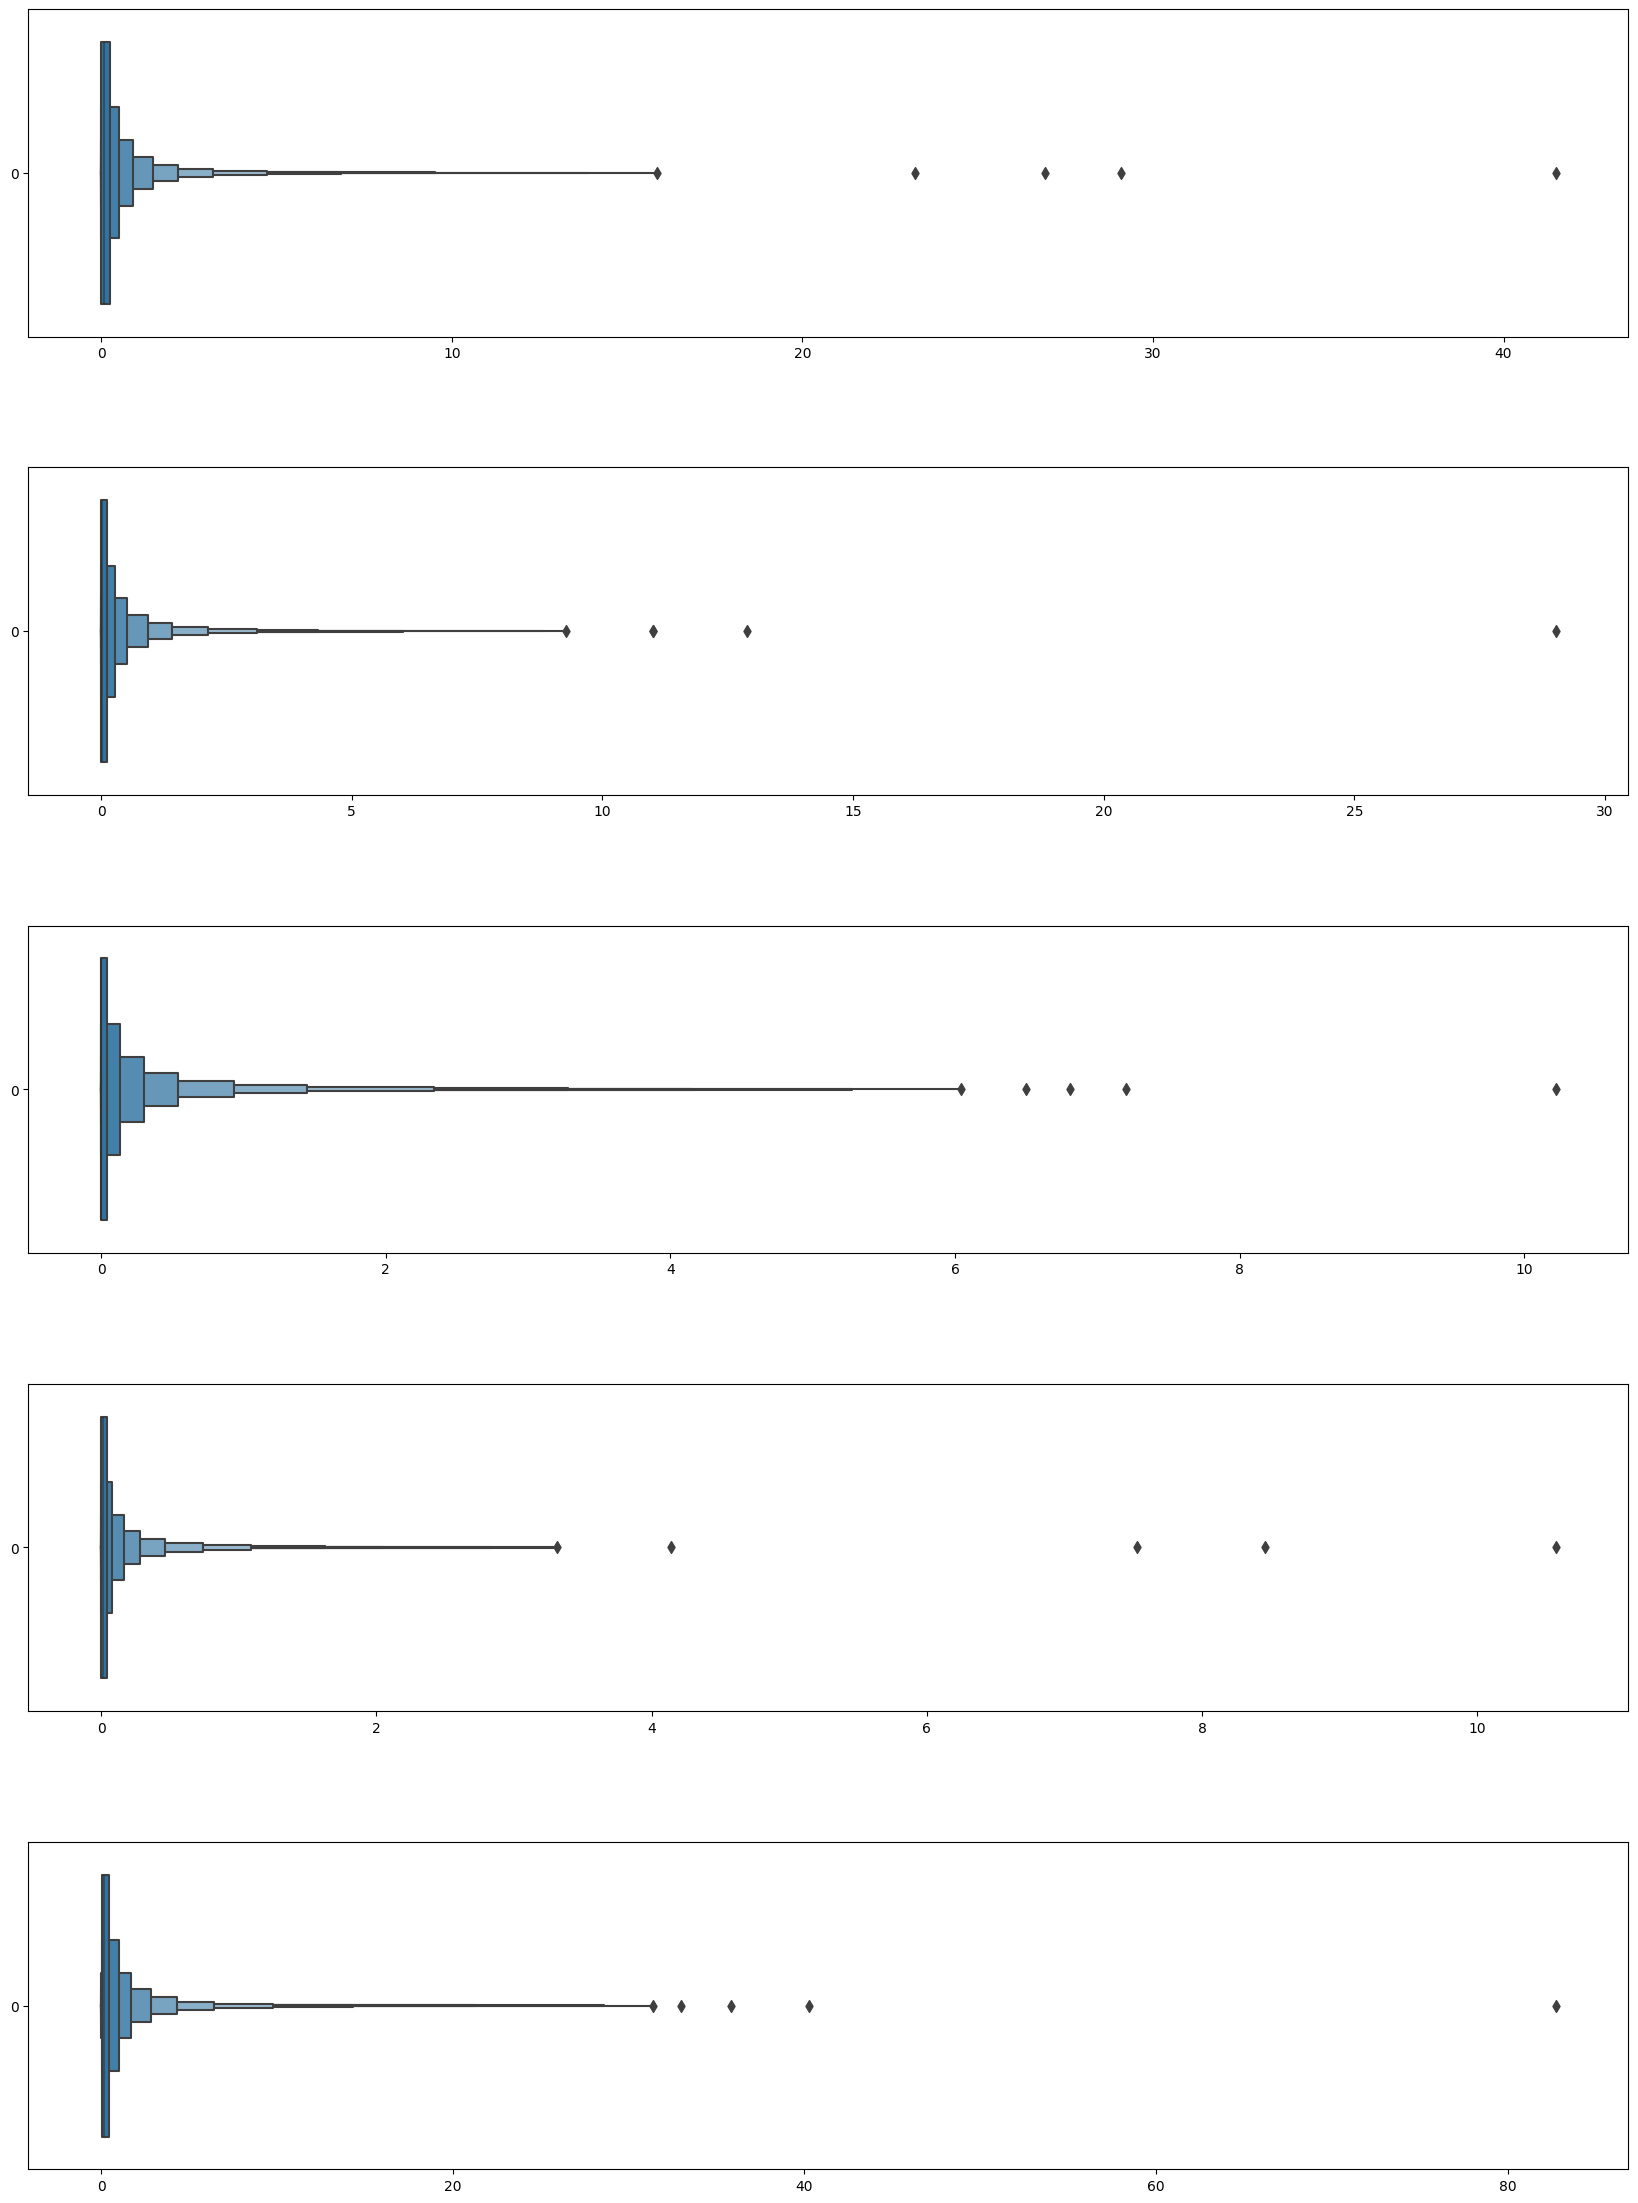

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(20,27))

sns.boxenplot(df['NA_Sales'],ax = ax[0], orient='h')
sns.boxenplot(df['EU_Sales'],ax = ax[1], orient='h')
sns.boxenplot(df['JP_Sales'],ax = ax[2], orient='h')
sns.boxenplot(df['Other_Sales'],ax = ax[3], orient='h')
sns.boxenplot(df['Global_Sales'],ax = ax[4], orient='h')

for ax_ in range(5):
    ax[ax_].xaxis.label.set_color('red')
    
parameters = {'axes.labelsize': 35}
plt.rcParams.update(parameters)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)

plt.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Year column checking outliers

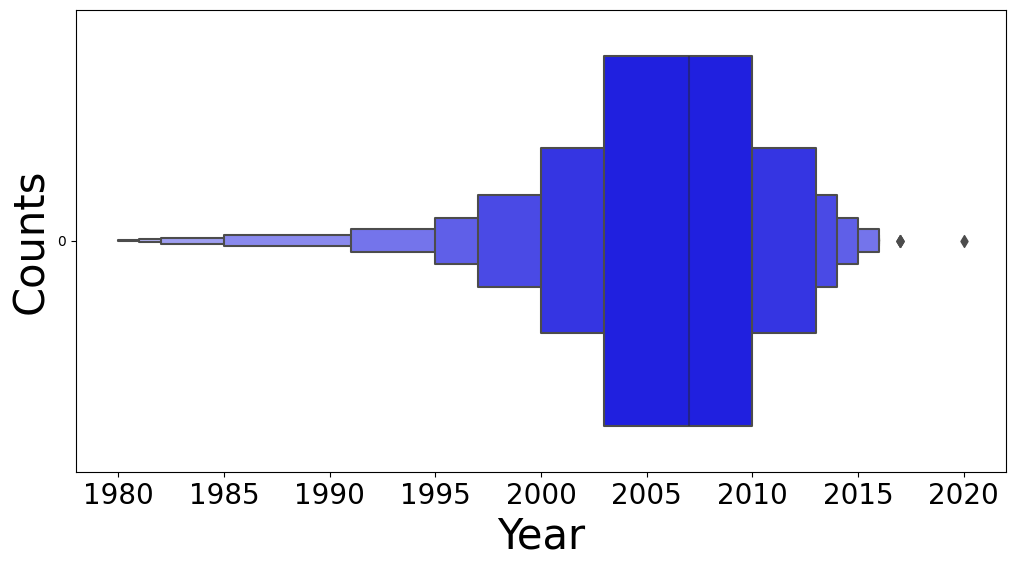

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.boxenplot(df['Year'], color='blue', orient='h')

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.set_xticklabels([int(a) for a in ax.get_xticks()], size = 20)

plt.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Genre column vizually analysis

In [12]:
df.groupby('Genre')['Name'].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1309
Simulation       867
Sports          2346
Strategy         681
Name: Name, dtype: int64

In [13]:
df.groupby('Genre')['Name'].count().iplot(kind = 'bar')

## -------------------------------------------------------------------------------------------------------------------------------

## Publishers

In [14]:
PublisherCount = df.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='count')
fig = px.treemap(PublisherCount, path=['Publisher'], values='count')
fig.update_layout(title_text='Number of Games Published by Publishers',
                  title_x=0.5, title_font=dict(size=22)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Platforms and Global Sales

Text(0.5, 1.0, 'Top 10 Platform wise global game Sales :')

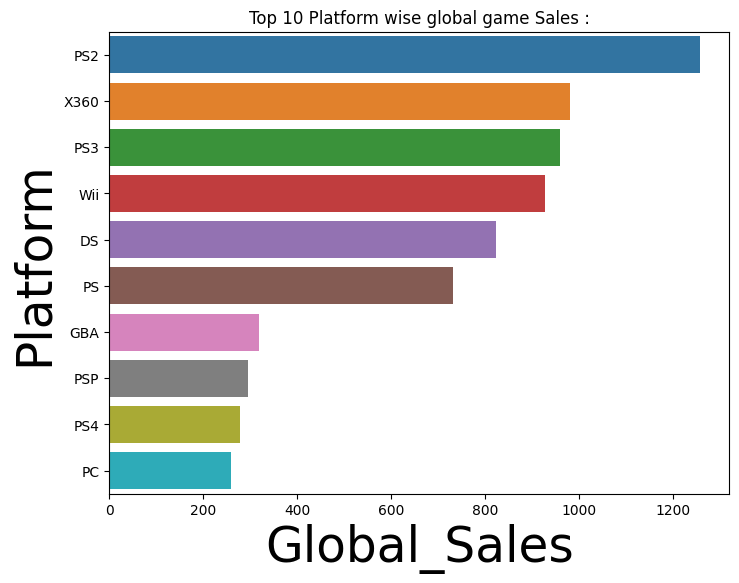

In [15]:
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(df ,index = "Platform",
                                           values = "Global_Sales",
                                           aggfunc = np.sum)

platform_wise_game_sales  = platform_wise_game_sales.sort_values(
                    by = "Global_Sales",ascending  = False).head(10)

sns.barplot(x = platform_wise_game_sales["Global_Sales"],y = platform_wise_game_sales.index,orient = "h")
plt.title("Top 10 Platform wise global game Sales :")

## -------------------------------------------------------------------------------------------------------------------------------

## Year and Global Sales

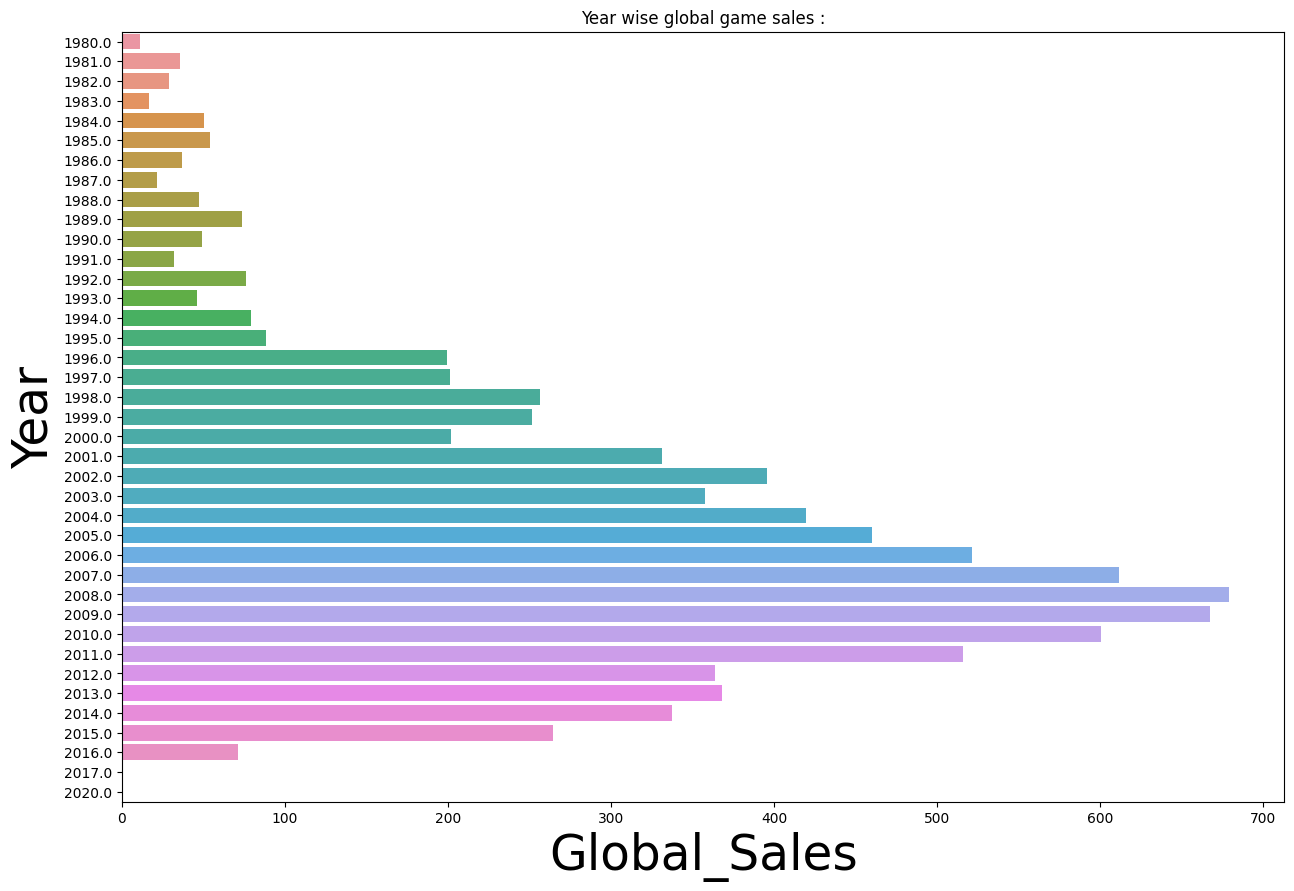

In [16]:
plt.rcParams['figure.figsize'] = (15,10)
year_wise_game_sales  = pd.pivot_table(df ,index = "Year" ,
                                       values = "Global_Sales",
                                       aggfunc = np.sum)
sns.barplot(x=year_wise_game_sales["Global_Sales"],y=year_wise_game_sales.index,orient = "h")
plt.title("Year wise global game sales :")
plt.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Anually published Games

In [17]:
AnnualNumberOfGames = df['Year'].groupby(df['Year']).count()

fig = px.line(AnnualNumberOfGames, x=AnnualNumberOfGames.index, y=AnnualNumberOfGames,
              labels={
                  "index": "Year",
                  "y": "Number of Games Published"
              }
              )
fig.update_layout(title_text='Number of Games Published Annually',
                  title_x=0.5, title_font=dict(size=24))

fig.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Genre and Global Sales

In [18]:
GenreTotalGames = df['Global_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()

fig = go.Figure(data=[go.Pie(labels=GenreTotalGames.index,
                             values=GenreTotalGames['Global_Sales'], opacity=0.9)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Video Game Sales by Genre',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Platform and Genre

In [19]:
fig = px.sunburst(data_frame=df,
                  path=["Platform", "Genre"],
                  color="Platform",
                  maxdepth=-1,
                  branchvalues='total',
                  hover_name='Platform',
                  hover_data={'Platform': False},
                  title='Platforms and their Game Genre Distribution', template='ggplot2'
                  )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=18))
fig.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Publishers and Global Sales

In [20]:
PublisherTotalGames = df['Global_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).to_frame()
PublisherTotalGames_top = PublisherTotalGames.nlargest(15, 'Global_Sales')[['Global_Sales']]

fig = px.bar(data_frame=PublisherTotalGames_top, x=PublisherTotalGames_top.index, y='Global_Sales', color=PublisherTotalGames_top.index)
fig.update_layout(title_text='Top 15 Publishers that have the highest Global Sales',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

## -------------------------------------------------------------------------------------------------------------------------------

## Difference between sales

In [21]:
AnnualSalesMarket = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['NA_Sales'],
                         name="North America Sales",
                         hovertext=AnnualSalesMarket['NA_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['EU_Sales'],
                         name="Europe Sales",
                         hovertext=AnnualSalesMarket['EU_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['JP_Sales'],
                         name="Japan Sales",
                         hovertext=AnnualSalesMarket['JP_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['Other_Sales'],
                         name="Other Sales",
                         hovertext=AnnualSalesMarket['Other_Sales']))

fig.update_layout(title_text='Video Game Sales for each Market Annually',
                  title_x=0.5, title_font=dict(size=22))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Years",
    yaxis_title="Sales (M)")

fig.show()

# ============================================================

# Cleaning

# ============================================================

## Platform feature cleaning

In [22]:
df.groupby("Platform").count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,
2600,133,116,133,133,133,133,133,133,133
3DO,3,3,3,3,3,3,3,3,3
3DS,509,500,509,507,509,509,509,509,509
DC,52,52,52,52,52,52,52,52,52
DS,2163,2133,2163,2156,2163,2163,2163,2163,2163
GB,98,97,98,98,98,98,98,98,98
GBA,822,811,822,796,822,822,822,822,822
GC,556,542,556,556,556,556,556,556,556
GEN,27,27,27,27,27,27,27,27,27


In [23]:
def change_cat(df, cat_list, to_cat):
    
    for val in cat_list:
        
        df['Platform'] = df['Platform'].replace({val : to_cat})
        
    return df 

In [24]:
df1 = df.copy()

In [25]:
cat_changes = {'3DS' :['3DO'],
               'DS'  :['DC'],
               'GBA' :['GB'],
               'PS'  :['PS', 'PS2', 'PS3', 'PS4'],
               'PSV' :['PSP'],
               'Sega':['SAT', 'SCD'],
               'SNES':['NES'],
               'Xbox':['X360', 'XB', 'XOne'],
               'Wii' :['WiiU']}

for key, value in cat_changes.items():
    df = change_cat(df, value, key)

In [26]:
vals_to_drop = ['GEN', 'GG', 'PCFX', 'TG16', 'WS', 'NG']

for val in vals_to_drop:
    
    indices = []
    indices.append(df[df['Platform'] == val].index)
    
    for drop in indices:
    
        df.drop(index=drop, axis= 0, inplace=True)
        df1.drop(index=drop, axis= 0, inplace=True)

In [27]:
df.groupby("Platform").count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,
2600,133,116,133,133,133,133,133,133,133
3DS,512,503,512,510,512,512,512,512,512
DS,2215,2185,2215,2208,2215,2215,2215,2215,2215
GBA,920,908,920,894,920,920,920,920,920
GC,556,542,556,556,556,556,556,556,556
N64,319,316,319,319,319,319,319,319,319
PC,960,943,960,954,960,960,960,960,960
PS,5022,4956,5022,5014,5022,5022,5022,5022,5022
PSV,1626,1609,1626,1622,1626,1626,1626,1626,1626


In [28]:
df.reset_index(drop=True, inplace=True)

## -------------------------------------------------------------------------------------------------------------------------------

## Publisher column cleaning

In [29]:
df.groupby('Publisher').count()['Genre'].sort_values(ascending=True).iplot()

In [30]:
df['Publisher'].dropna(inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)

In [31]:
publisher = pd.DataFrame(df['Publisher'].value_counts())
publisher['cumsum'] = publisher['Publisher'].values.cumsum()
publisher

,Publisher,cumsum
Electronic Arts,1351,1351
Activision,975,2326
Namco Bandai Games,928,3254
Ubisoft,921,4175
Konami Digital Entertainment,831,5006
...,...,...
Abylight,1,16486
Glams,1,16487
Locus,1,16488
Warp,1,16489


In [32]:
16490 / 5

3298.0

In [33]:
df['Publisher'].value_counts()[:50]

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         928
Ubisoft                                    921
Konami Digital Entertainment               831
THQ                                        715
Nintendo                                   702
Sony Computer Entertainment                683
Sega                                       620
Take-Two Interactive                       413
Capcom                                     379
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

## -------------------------------------------------------------------------------------------------------------------------------

### 3298 - Ubisoft
### 6596 - Sony Computer Entertainment
### 9894 - Disney Interactive Studios
### 13192 - Destineer
### 16490 - Others

## -------------------------------------------------------------------------------------------------------------------------------

### In my opinion, if a company has many popular products then that company can be called 'Large Company', going by that way, companies can be called 'Medium Large', 'Small' and etc.

### So, doing that on analysis, I seperated them into groups using 3298 value boundaries. And names which is written above shows those boundary points of seperated groups.

## -------------------------------------------------------------------------------------------------------------------------------

In [34]:
publisher[publisher['cumsum'] > 3298]

,Publisher,cumsum
Ubisoft,921,4175
Konami Digital Entertainment,831,5006
THQ,715,5721
Nintendo,702,6423
Sony Computer Entertainment,683,7106
...,...,...
Abylight,1,16486
Glams,1,16487
Locus,1,16488
Warp,1,16489


## -------------------------------------------------------------------------------------------------------------------------------

## Groupping 

## -------------------------------------------------------------------------------------------------------------------------------

### 3298 - Ubisoft
### 6596 - Sony Computer Entertainment
### 9894 - Disney Interactive Studios
### 13192 - Destineer
### 16490 - Others

## -------------------------------------------------------------------------------------------------------------------------------

In [35]:
df['Publisher'].value_counts().loc['Destineer']

45

In [36]:
def encoder(x):
    
    counts = df['Publisher'].value_counts()
    
    if counts[x] <= 45:
        return 'Small Publisher'
    
    elif counts[x] > 45 and counts[x] < 217:
        return 'Small Medium Publisher'
    
    elif counts[x] >= 217 and counts[x] < 682:
        return 'Medium Publisher'
    
    elif counts[x] >= 682 and counts[x] < 920:
        return 'Medium Large Publisher'
    
    elif counts[x] >= 920:
        return 'Large Publisher'

In [37]:
df['Publisher'][df['Publisher'].isnull()] = 'Others'

df['Publisher'] = df['Publisher'].apply(lambda x: encoder(x))

In [38]:
df['Publisher'].value_counts()

Large Publisher           4175
Small Publisher           3326
Small Medium Publisher    3320
Medium Large Publisher    2931
Medium Publisher          2796
Name: Publisher, dtype: int64

## -------------------------------------------------------------------------------------------------------------------------------

## Name feature - has high cardinality so keeping it in data can cause to misleading of model

In [39]:
df['Name'].value_counts().iplot()

In [40]:
df.drop('Name', axis=1, inplace=True)

## ======================================================================

# Imputing

## Year feature imputing

In [41]:
df1['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'DC', 'PSV', 'SAT', 'SCD', '3DO'], dtype=object)

In [42]:
values_to_predict_year = pd.get_dummies(df1['Platform'])
values_to_predict_year = pd.concat([values_to_predict_year, df1['Year']], axis=1)

In [43]:
values_to_predict_year

,2600,3DO,3DS,DC,DS,GB,GBA,GC,N64,NES,...,PSV,SAT,SCD,SNES,Wii,WiiU,X360,XB,XOne,Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2006.0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1985.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2008.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2009.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2002.0
16594,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2003.0
16595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2008.0
16596,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2010.0


### KNN Imputer

In [44]:
imputer = KNNImputer(n_neighbors=5)

year_imputed = imputer.fit_transform(values_to_predict_year)
year_imputed = pd.DataFrame(year_imputed, columns = values_to_predict_year.columns).round(1)

In [45]:
values_to_predict_year['Year_impt'] = year_imputed['Year']

In [46]:
e = values_to_predict_year[values_to_predict_year['Year'].isnull()]
e.reset_index(drop=True, inplace=True)

In [47]:
year_imputed['Year'] = [int(x) for x in year_imputed['Year']]
df['Year'] =  year_imputed['Year']

## -------------------------------------------------------------------------------------------------------------------------------

# Encoding

### Platform and Genre encoding

In [48]:
from sklearn.preprocessing import LabelEncoder


df[['Platform', 'Genre', 'Publisher']] = df[['Platform', 'Genre', 'Publisher']].apply(LabelEncoder().fit_transform)

## ======================================================================

## Data Splitting

In [50]:
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## ======================================================================

# Correlated features

<AxesSubplot: >

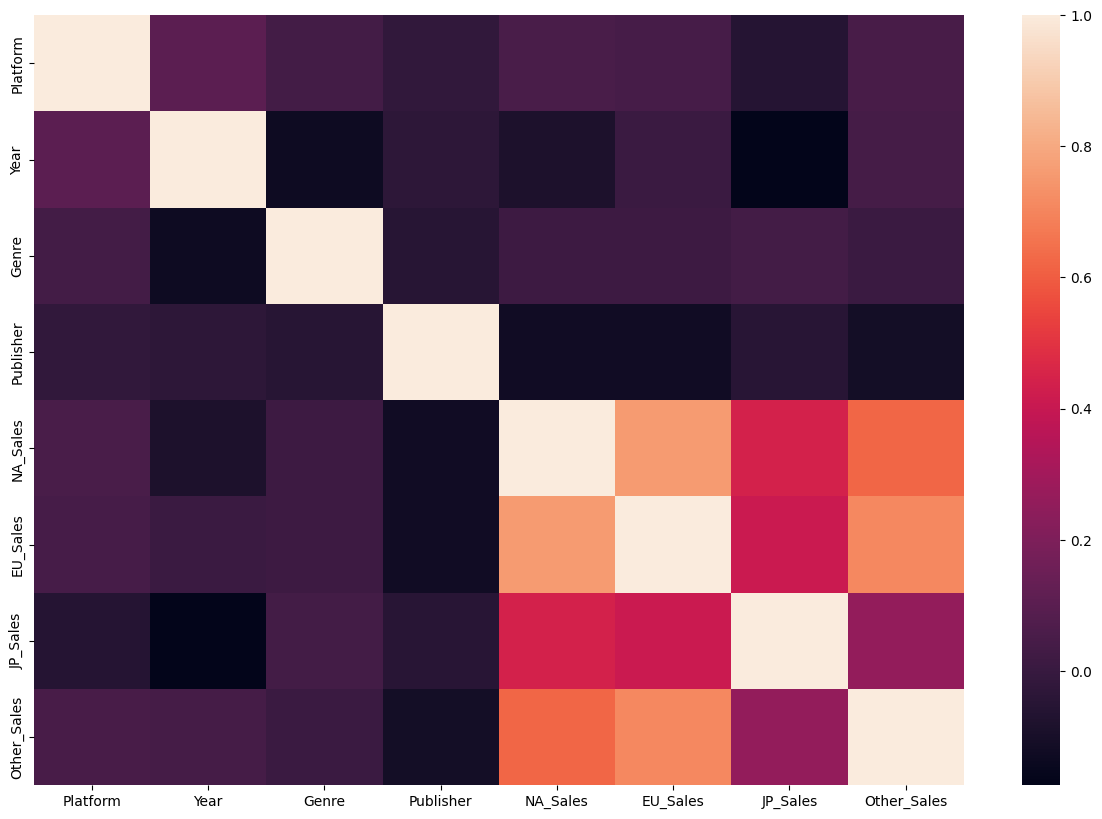

In [52]:
sns.heatmap(X_train.corr())

In [53]:
X_train.corr()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,1.000000,0.101852,0.036639,-0.021029,0.050671,0.044104,-0.058777,0.047268
Year,0.101852,1.000000,-0.128492,-0.032633,-0.087034,0.009191,-0.174255,0.040831
Genre,0.036639,-0.128492,1.000000,-0.052479,0.017827,0.017385,0.032366,0.008600
Publisher,-0.021029,-0.032633,-0.052479,1.000000,-0.122583,-0.122603,-0.049253,-0.112195
NA_Sales,0.050671,-0.087034,0.017827,-0.122583,1.000000,0.759051,0.444181,0.621361
EU_Sales,0.044104,0.009191,0.017385,-0.122603,0.759051,1.000000,0.411620,0.709417
JP_Sales,-0.058777,-0.174255,0.032366,-0.049253,0.444181,0.411620,1.000000,0.261066
Other_Sales,0.047268,0.040831,0.008600,-0.112195,0.621361,0.709417,0.261066,1.000000


## -------------------------------------------------------------------------------------------------------------------------------

### Checking collinearity by threshold

In [54]:
from corr_checker import Correlation_checker

## -------------------------------------------------------------------------------------------------------------------------------

In [55]:
corr_obj = Correlation_checker(X_train, 0.8)

In [56]:
X_train.corr()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,1.000000,0.101852,0.036639,-0.021029,0.050671,0.044104,-0.058777,0.047268
Year,0.101852,1.000000,-0.128492,-0.032633,-0.087034,0.009191,-0.174255,0.040831
Genre,0.036639,-0.128492,1.000000,-0.052479,0.017827,0.017385,0.032366,0.008600
Publisher,-0.021029,-0.032633,-0.052479,1.000000,-0.122583,-0.122603,-0.049253,-0.112195
NA_Sales,0.050671,-0.087034,0.017827,-0.122583,1.000000,0.759051,0.444181,0.621361
EU_Sales,0.044104,0.009191,0.017385,-0.122603,0.759051,1.000000,0.411620,0.709417
JP_Sales,-0.058777,-0.174255,0.032366,-0.049253,0.444181,0.411620,1.000000,0.261066
Other_Sales,0.047268,0.040831,0.008600,-0.112195,0.621361,0.709417,0.261066,1.000000


In [57]:
corr_feats = corr_obj.check_by_threshold()

corr_feats

[]


[]

## ======================================================================

# Outlier removing

In [58]:
from outlier_removing import IQR_Method, ZscoreMethod

In [59]:
iqr_obj1 = IQR_Method(X_train, y_train, q1=15, q3= 95, coeff=1.5)

In [60]:
X_train_iqr, y_train_iqr = iqr_obj1.remove_all()

Data shape before: (13238, 8)
Target shape before: (13238,)
Feature: Platform
Outliers removed: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Year
Outliers removed: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Genre
Outliers removed: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Na_Sales
Outliers removed: 140
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Eu_Sales
Outliers removed: 124
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Jp_Sales
Outliers removed: 184
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Other_Sales
Outliers removed: 82
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [61]:
iqr_obj2 = IQR_Method(X_test, y_test, q1=15, q3= 95, coeff=1.5)

X_test_iqr, y_test_iqr = iqr_obj1.remove_all()

Data shape before: (12708, 8)
Target shape before: (12708,)
Feature: Platform
Outliers removed: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Year
Outliers removed: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Genre
Outliers removed: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Na_Sales
Outliers removed: 56
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Eu_Sales
Outliers removed: 42
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Jp_Sales
Outliers removed: 59
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: Other_Sales
Outliers removed: 32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ======================================================================

# Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)

X_test = mm.transform(X_test)

In [64]:
len(X_train), len(y_train)

(13238, 13238)

In [65]:
X_test

array([[1.66666667e-01, 6.50000000e-01, 6.36363636e-01, ...,
        0.00000000e+00, 1.95694716e-03, 0.00000000e+00],
       [5.83333333e-01, 5.00000000e-01, 0.00000000e+00, ...,
        2.06753963e-03, 0.00000000e+00, 9.46073794e-04],
       [5.83333333e-01, 8.25000000e-01, 8.18181818e-01, ...,
        0.00000000e+00, 1.17416830e-02, 0.00000000e+00],
       ...,
       [9.16666667e-01, 7.75000000e-01, 9.09090909e-01, ...,
        1.72294969e-03, 0.00000000e+00, 9.46073794e-04],
       [2.50000000e-01, 5.75000000e-01, 0.00000000e+00, ...,
        6.54720882e-03, 0.00000000e+00, 9.46073794e-04],
       [1.00000000e+00, 6.75000000e-01, 6.36363636e-01, ...,
        0.00000000e+00, 9.78473581e-04, 9.46073794e-04]])

## ======================================================================

# Modeling

## ======================================================================

# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [67]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = lin_reg.predict(X_test)
y_pred_tr = lin_reg.predict(X_train)

print("R2 score tr :",r2_score(y_train, y_pred_tr))
print("R2 score test :",r2_score(y_test, y_pred))
print("Mean absolute error tr :", mean_absolute_error(y_train, y_pred_tr))
print("Mean absolute error test :", mean_absolute_error(y_test, y_pred))
print("Mean squared error tr :", mean_squared_error(y_train, y_pred_tr))
print("Mean squared error test :", mean_squared_error(y_test, y_pred))

R2 score tr : 0.999989061484959
R2 score test : 0.9999871323933932
Mean absolute error tr : 0.0029046986249577364
Mean absolute error test : 0.0029360815364685732
Mean squared error tr : 2.7257992010806413e-05
Mean squared error test : 2.7508762151432085e-05


# =============================================================

## Decision Tree Regression

## 3 max depth

In [70]:
from sklearn.tree import DecisionTreeRegressor


dec_tree = DecisionTreeRegressor(max_depth = 3)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [71]:
y_pred = dec_tree.predict(X_test)
y_pred_tr = dec_tree.predict(X_train)

print("R2 score tr :",r2_score(y_train, y_pred_tr))
print("R2 score test :",r2_score(y_test, y_pred))
print("Mean absolute error tr :", mean_absolute_error(y_train, y_pred_tr))
print("Mean absolute error test :", mean_absolute_error(y_test, y_pred))
print("Mean squared error tr :", mean_squared_error(y_train, y_pred_tr))
print("Mean squared error test :", mean_squared_error(y_test, y_pred))

R2 score tr : 0.8831524014008304
R2 score test : 0.8514458671228473
Mean absolute error tr : 0.2677564097965603
Mean absolute error test : 0.26080711296313597
Mean squared error tr : 0.2911758037707764
Mean squared error test : 0.3175835594599972


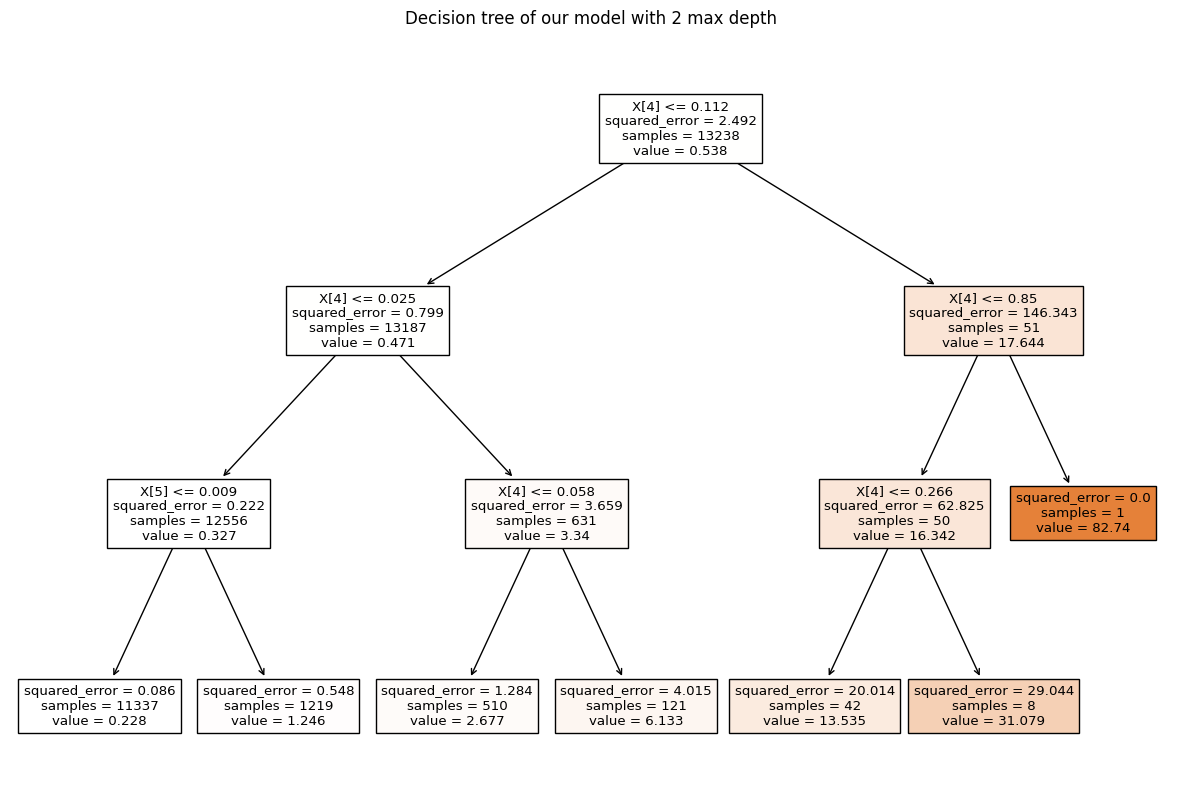

In [72]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(dec_tree, filled=True)
plt.title("Decision tree of our model with 2 max depth")
plt.show()

## 5 max depth

In [73]:
dec_tree = DecisionTreeRegressor(max_depth = 5)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [74]:
y_pred = dec_tree.predict(X_test)
y_pred_tr = dec_tree.predict(X_train)

print("R2 score tr :",r2_score(y_train, y_pred_tr))
print("R2 score test :",r2_score(y_test, y_pred))
print("Mean absolute error tr :", mean_absolute_error(y_train, y_pred_tr))
print("Mean absolute error test :", mean_absolute_error(y_test, y_pred))
print("Mean squared error tr :", mean_squared_error(y_train, y_pred_tr))
print("Mean squared error test :", mean_squared_error(y_test, y_pred))

R2 score tr : 0.9610602975461746
R2 score test : 0.9339451074659433
Mean absolute error tr : 0.16194267198554615
Mean absolute error test : 0.16701891953082634
Mean squared error tr : 0.0970349352191827
Mean squared error test : 0.14121416539828685


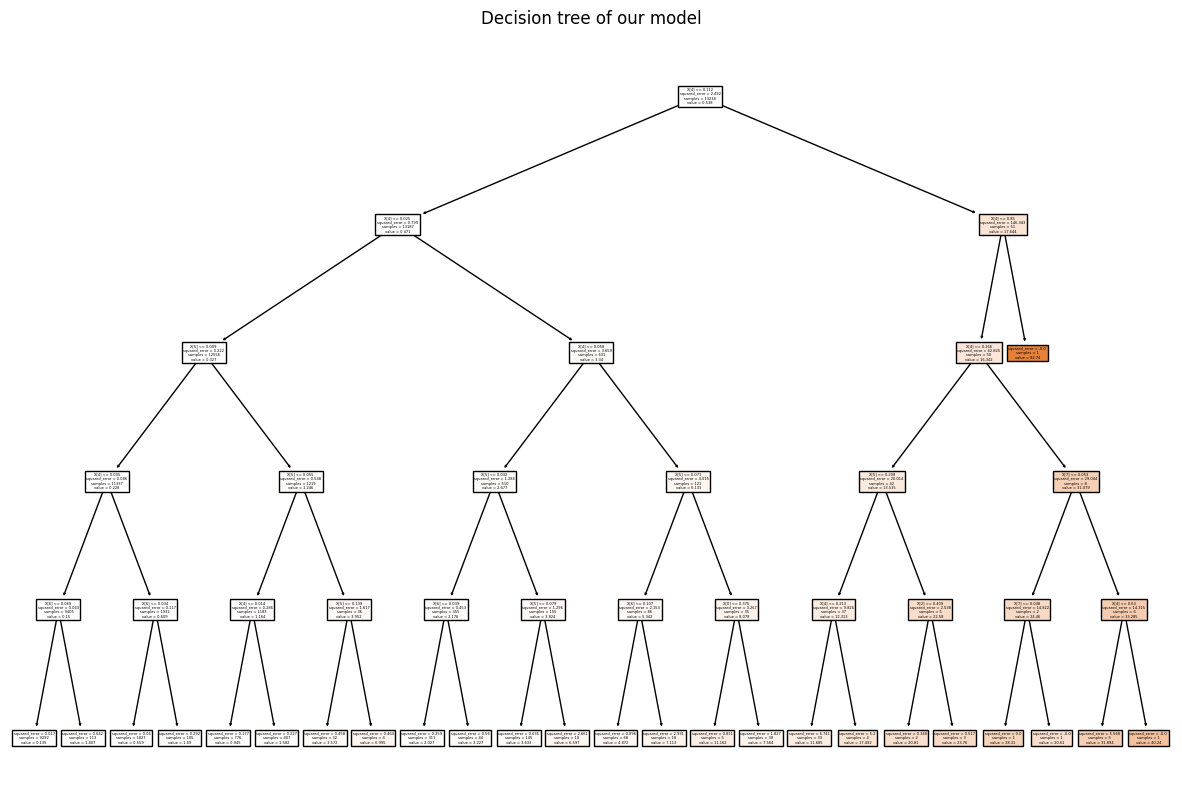

In [75]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(dec_tree, filled=True)
plt.title("Decision tree of our model")
plt.show()

# =============================================================

# KNN Regression

In [76]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=2)

knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

## 2 Neighbor

In [77]:
y_pred_tr = knn_reg.predict(X_train)
y_pred = knn_reg.predict(X_test)

In [78]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9460249308158103
R2 for test set :  0.8195202169584361


In [79]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.1149410787127965
MSE tr :  0.13450198670494032
MAE test :  0.23273867069486406
MSE test :  0.3858351888217523


## 3 Neighbor

In [80]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)

knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [81]:
y_pred_tr = knn_reg.predict(X_train)
y_pred = knn_reg.predict(X_test)

In [82]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9041884718972757
R2 for test set :  0.8070126550999037


In [83]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.1552870524248376
MSE tr :  0.23875543049470374
MAE test :  0.24401711983887212
MSE test :  0.41257423632091306


## 5 Neighbor

In [84]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [85]:
y_pred_tr = knn_reg.predict(X_train)
y_pred = knn_reg.predict(X_test)

In [86]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.820690625044617
R2 for test set :  0.7588470502182666


In [87]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.21237150626982926
MSE tr :  0.44682605378455953
MAE test :  0.27498670694864047
MSE test :  0.5155441365558913


# =============================================================

# SVM

## C = 1       epsilon = 1

In [88]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1, epsilon=1)

In [89]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=1)

In [90]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [91]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.439152324577629
R2 for test set :  0.547014841000893


In [92]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.8570053136682703
MSE tr :  1.3975920313456998
MAE test :  0.8561116839365231
MSE test :  0.9684054990005235


## C = 1       epsilon = 10

In [93]:
svr = SVR(kernel='rbf', C=1, epsilon=10)

In [94]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=10)

In [95]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [96]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  -35.58502296412928
R2 for test set :  -41.49512964449167


In [97]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  9.489853658456136
MSE tr :  91.16724344584313
MAE test :  9.492353115616368
MSE test :  90.84738519777206


## C = 10       epsilon = 1

In [98]:
svr = SVR(kernel='poly', C=10, epsilon=1)

In [99]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=1, kernel='poly')

In [100]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [101]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.8638603924439475
R2 for test set :  0.8174553835648811


In [102]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.44979077155451597
MSE tr :  0.3392501012464397
MAE test :  0.4559525379397187
MSE test :  0.39024945267370004


## C = 10       epsilon = 10

In [103]:
svr = SVR(kernel='rbf', C=10, epsilon=10)

In [104]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=10)

In [105]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [106]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  -30.646029755536247
R2 for test set :  -35.76978825727385


In [107]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  8.832407156249587
MSE tr :  78.85962793152052
MAE test :  8.826856717928676
MSE test :  78.60757563030685


# =============================================================

# Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=20, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [109]:
y_pred_tr = rf_reg.predict(X_train)
y_pred = rf_reg.predict(X_test)

In [110]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9829623631863966
R2 for test set :  0.9590180668621012


In [111]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.013419085017045557
MSE tr :  0.042456564388399606
MAE test :  0.03056026453028342
MSE test :  0.08761242751992941


# =============================================================

# CV

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
models = [lin_reg, dec_tree, knn_reg, svr, rf_reg]

In [115]:
for model in models:
    print("Model:",model)
    print('\n')
    print(cross_val_score(model, X_train, y_train, cv=5), '-----Mean------ >',np.mean(cross_val_score(model, X_train, y_train, cv=5)))
    print('='*100)
    print('\n')

Model: LinearRegression()


[0.99998576 0.99998974 0.99999352 0.9999857  0.99998396] -----Mean------ > 0.9999877369748932


Model: DecisionTreeRegressor(max_depth=5)


[0.887026   0.89054697 0.80396147 0.90029214 0.90509475] -----Mean------ > 0.7883828969375133


Model: KNeighborsRegressor()


[0.69272669 0.71152011 0.62501115 0.72389705 0.66619457] -----Mean------ > 0.6838699133792133


Model: SVR(C=10, epsilon=10)


[-40.83645843 -31.87867879 -18.85930886 -40.49308846 -43.55528683] -----Mean------ > -35.124564275983246


Model: RandomForestRegressor(n_estimators=20, random_state=0)


[0.9704405  0.96670377 0.79014505 0.98315375 0.97579677] -----Mean------ > 0.9372479700432755




# =============================================================

# Lazy Predict

In [116]:
from lazypredict.Supervised import LazyRegressor

In [117]:
reg = LazyRegressor(ignore_warnings=True, verbose=False)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [02:11<00:00,  3.13s/it]


In [118]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsIC,1.00,1.00,0.01,0.03
OrthogonalMatchingPursuitCV,1.00,1.00,0.01,0.04
Ridge,1.00,1.00,0.01,0.04
RidgeCV,1.00,1.00,0.01,0.04
BayesianRidge,1.00,1.00,0.01,0.02
LinearRegression,1.00,1.00,0.01,0.02
LassoLarsCV,1.00,1.00,0.01,0.05
LarsCV,1.00,1.00,0.01,0.06
TransformedTargetRegressor,1.00,1.00,0.01,0.02


# =============================================================

# Ensemble Learning Methods

# =============================================================

# Bagging Regressor

In [119]:
from sklearn.ensemble import BaggingRegressor

In [120]:
bag_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                             n_estimators=100,
                             max_samples=0.8,
                             oob_score=True,
                             random_state=0)

bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=100, oob_score=True, random_state=0)

In [121]:
bag_model.oob_score_

0.9081300572544183

In [122]:
y_pred_tr = bag_model.predict(X_train)
y_pred = bag_model.predict(X_test)

In [123]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9796254148391462
R2 for test set :  0.9835336367490449


In [124]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  0.013900615873462821
MSE tr :  0.050771999440559275
MAE test :  0.024316568876616866
MSE test :  0.035202293947110205


## Ada Boost Regressor

### Ada Boost

In [126]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [127]:
adaboost = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.2).fit(X_train, y_train)
score = adaboost.score(X_test, y_test)

score

0.8460544072802947

In [128]:
y_pred_tr = adaboost.predict(X_train)
y_pred = adaboost.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.8801219654340641
R2 for test set :  0.8460544072802947
MAE tr :  0.47501819894552494
MSE tr :  0.2987274320368051
MAE test :  0.4797163234109577
MSE test :  0.32910958687048625


### XG Boost

In [129]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [130]:
score = xgb.score(X_test, y_test)
score

0.9900546429081494

In [131]:
y_pred_tr = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.9999324589832487
R2 for test set :  0.9900546429081494
MAE tr :  0.008037845815470984
MSE tr :  0.00016830735142039794
MAE test :  0.02509472981573637
MSE test :  0.021261487944886425


# LightGBM Regressor

In [132]:
import lightgbm

In [133]:
light = lightgbm.LGBMRegressor()

light.fit(X_train, y_train)

LGBMRegressor()

In [134]:
score = light.score(X_test, y_test)
score

0.9203407102353885

In [135]:
y_pred_tr = light.predict(X_train)
y_pred = light.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.9119285834780906
R2 for test set :  0.9203407102353885
MAE tr :  0.027190906088397238
MSE tr :  0.2194676296512271
MAE test :  0.04118641981912966
MSE test :  0.1702980610335578


# Stacking

In [136]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [137]:
stack = StackingCVRegressor(regressors=(ridge, lasso, svr, rf, lgbm, xgb),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)
score = r2_score(y_test, pred)

score

0.9988161788103885

In [139]:
y_pred_tr = stack.predict(X_train)
y_pred = stack.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.9994435213981144
R2 for test set :  0.9988161788103885
MAE tr :  0.008552421119420357
MSE tr :  0.0013867046146246438
MAE test :  0.012248977666118623
MSE test :  0.0025308090719487614
